# Chargement des librairies

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive/Gamma Moyen 5%


In [ ]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

from sklearn.preprocessing import StandardScaler, OneHotEncoder



from joblib import dump, load

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV

from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
import random
import numpy

import pandas.util.testing as tm

import joblib

# Données

Chargement du fichier comportant les données et sélection des colonnes nécessaires pour l'analyse :

In [ ]:
df = pad.read_excel('XXXXXXXXXXXX.xlsx')
columns = ['SAS10', 'MCSv', 'LT',	'LTMCS',	'AAV',	'LSV','Class_GM_GI', 'Localisation']
df = df[columns]

Choix de la localisation que l'on souhaite étudier :

In [ ]:
df = df[df['Localisation'] == 'XXXXXXXXXXX']
df.dropna(axis = 0, how ='any')

Analyse de la disproportionnalité des classes :

In [ ]:
df['Class_GM_GI'].value_counts()

1    1569
0      63
Name: Class_GM_5%, dtype: int64

Répartition des données : 
  - X correspond aux 6 indices de complexité
  - y correspond à la colonne de référence 

In [ ]:
X = df.drop("Class_GM_GI", axis = 1)
y = df["Class_GM_GI"]

In [ ]:
X_np = np.array(X)

In [ ]:
sc = StandardScaler()

In [ ]:
X_norm = sc.fit_transform(X_np)

In [ ]:
dump(sc, 'StandardScaler_GMGI.joblib')

['StandardScaler_GMGI.joblib']

In [ ]:
sc = load('StandardScaler_GMGI.joblib')

In [ ]:
X = X_norm

Répartition des données en données d'entraînement et de test et fixation du random state :

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 7)

Sur-échantillonnage des données d'entraînement afin d'avoir une proportion entre les deux classes : 

In [ ]:
ros = RandomOverSampler(sampling_strategy='minority')
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Modèles

Choix du modèle et obtention des scores d'entraînements et de prédictions sans optimisation des hyperparamètres :

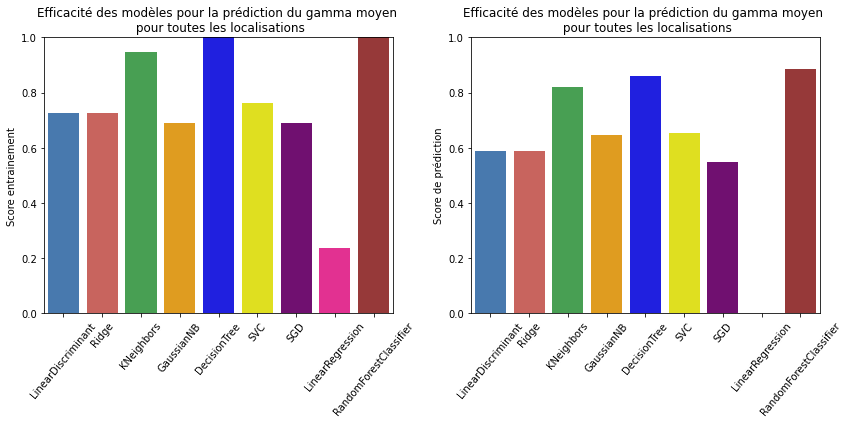

In [ ]:
# Création des modèles
List_of_models = [LinearDiscriminantAnalysis(), RidgeClassifier(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(), SVC(), SGDClassifier(), LinearRegression(), RandomForestClassifier()]
List_of_models_for_graph = ["LinearDiscriminant", "Ridge", "KNeighbors", "GaussianNB", "DecisionTree", "SVC", "SGD", "LinearRegression", "RandomForestClassifier"]

def run_model_and_performance_check(model):

    # Choix du modèle et entraînement du modèle
    model_class = model
    model_class.fit(X_train_res, y_train_res)

    # Prédiction du modèle et archivage des résultats
    y_pred = model_class.predict(X_test)

    # Création des dataframes résultats
    results_classification = np.array([model_class.score(X_train_res,y_train_res), model_class.score(X_test,y_test)])
    df_results = pad.DataFrame(index = ["Score entrainement", "Score de prédiction"], columns = [str(model)[:-2]])
    df_results[str(model)[:-2]] = results_classification

    return df_results

df_results = pad.DataFrame(index = ["Score entrainement", "Score de prédiction", "MAE", "RMSE", "median absolute error"], columns = ["LinearDiscriminant"])

for i in range(len(List_of_models)):
  model_class = List_of_models[i] 
  model_class.fit(X_train_res, y_train_res)
  y_pred = model_class.predict(X_test)
  results_classification = np.array([model_class.score(X_train_res,y_train_res), model_class.score(X_test,y_test), mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred)), median_absolute_error(y_test,y_pred)])
  df_results[List_of_models_for_graph[i]] = results_classification

custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette)

df_graph = df_results.transpose()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1 = sns.barplot(x=df_graph.index, y=df_graph["Score entrainement"].values, data=df_graph, ax=axs[0], palette = custom_palette)
ax2 = sns.barplot(x=df_graph.index, y=df_graph["Score de prédiction"].values, data=df_graph, ax=axs[1], palette = custom_palette)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=50)
ax1.set_title('Efficacité des modèles pour la prédiction de la combinaison \n du gamma moyen et du gamma index pour la localisation XXXXX')
ax1.set_ylabel('Score entrainement')
ax1.set(ylim=(0, 1))
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=50)
ax2.set_title('Efficacité des modèles pour la prédiction de la combinaison \n du gamma moyen et du gamma index pour la localisation XXXXX')
ax2.set_ylabel('Score de prédiction')
ax2.set(ylim=(0, 1))

plt.tight_layout()
#fig.savefig("Performance modèles classification toutes localisations", dpi=400)

Recherche des hyperparamètres des modèles :

In [ ]:
# Modèle LinearDiscriminant 
LinearDiscriminant_parameters = {'solver' : ['svd', 'lsqr', 'eigen'], 
                                 'store_covariance' : [True, False],
                                 'tol' : [0.0001,0.0002,0.0003]}

LinearDiscriminant_GridSearchCV = GridSearchCV(estimator = LinearDiscriminantAnalysis(), param_grid = LinearDiscriminant_parameters, cv = 5, n_jobs=-1)
LinearDiscriminant_GridSearchCV.fit(X_train_res, y_train_res)
LinearDiscriminant_GridSearchCV.best_params_
print("LinearDiscriminant best param = " + str(LinearDiscriminant_GridSearchCV.best_params_))

# Modèle RidgeClassifier
RidgeClassifier_parameters = {'alpha' : list(range(1,20)),
                              'fit_intercept' : [True, False],
                              'copy_X' : [True, False],
                              'tol' : [0.0001,0.0002,0.0003],
                              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

RidgeClassifier_GridSearchCV = GridSearchCV(estimator = RidgeClassifier(), param_grid = RidgeClassifier_parameters, cv = 5, n_jobs=-1)
RidgeClassifier_GridSearchCV.fit(X_train_res, y_train_res)
RidgeClassifier_GridSearchCV.best_params_
print("RidgeClassifier best param = " + str(RidgeClassifier_GridSearchCV.best_params_))

# Modèle KNeighbors
KNeighborsClassifier_parameters = {#'n_neighbors' : list(range(1,50)),
                                   #'leaf_size' : list(range(1,30)), 
                                   'p':[1,2], 
                                   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                                   'metric' : ['minkowski','euclidean','manhattan']}

KNeighborsClassifier_GridSearchCV = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = KNeighborsClassifier_parameters, cv = 5, n_jobs=-1)
KNeighborsClassifier_GridSearchCV.fit(X_train_res, y_train_res)
KNeighborsClassifier_GridSearchCV.best_params_
print("KNeighborsClassifier best param = " + str(KNeighborsClassifier_GridSearchCV.best_params_))

# Modèle GaussianNB
GaussianNB_parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
GaussianNB_GridSearchCV = GridSearchCV(estimator = GaussianNB(), param_grid = GaussianNB_parameters, cv = 5, n_jobs=-1)
GaussianNB_GridSearchCV.fit(X_train_res, y_train_res)
GaussianNB_GridSearchCV.best_params_

print("GaussianNB best param = " +str(GaussianNB_GridSearchCV.best_params_))

# Modèle DecisionTree
DecisionTreeClassifier_parameters = {#'max_features' : ['auto', 'sqrt', '“log2'],
                                     'max_depth': [2, 10, 15,18,20],
                                     'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100],
                                     "min_samples_split": [2, 6, 20],
                                     'criterion': ["gini", "entropy"],
                                     'splitter' : ['best', 'random'],
                                     'min_samples_split' : np.linspace(0.1, 1.0, 5, endpoint=True).tolist()}

DecisionTreeClassifier_GridSearchCV = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = DecisionTreeClassifier_parameters, cv = 5, n_jobs=-1, verbose = 2)
DecisionTreeClassifier_GridSearchCV.fit(X_train_res, y_train_res)
DecisionTreeClassifier_GridSearchCV.best_params_
print("DecisionTreeClassifier best param = " +str(DecisionTreeClassifier_GridSearchCV.best_params_))

# Modèle SVC
SVC_parameters = {#'C': [1, 10, 50, 100, 200, 300],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                  'probability': [True, False]}
                  
SVC_GridSearchCV = GridSearchCV(estimator = SVC(), param_grid = SVC_parameters, cv=5, n_jobs=-1, verbose=2)
SVC_GridSearchCV.fit(X_train_res, y_train_res)
SVC_GridSearchCV.best_params_
print("SVC best param = " +str(SVC_GridSearchCV.best_params_))

# Modèle SGD
SGD_parameters = {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'penalty' : ['l1', 'l2', 'elasticnet'], 
                  'alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1], 
                  'l1_ratio' : [0, 0.10, 0.15, 0.20, 0.30], 
                  'fit_intercept' : [True, False],
                  'tol' : [0.0001,0.0002,0.0003]}


SGD_GridSearchCV = GridSearchCV(estimator = SGDClassifier(), param_grid = SGD_parameters, cv=5, n_jobs=-1, verbose=2)
SGD_GridSearchCV.fit(X_train_res, y_train_res)
SGD_GridSearchCV.best_params_
print("SGD best param = " +str(SGD_GridSearchCV.best_params_))

# Modèle LinearRegression
LinearRegression_parameters = {'fit_intercept' : [True, False], 
                               'copy_X' : [True, False], 
                               'positive' : [True, False]}


LinearRegression_GridSearchCV = GridSearchCV(estimator = LinearRegression(), param_grid = LinearRegression_parameters, cv=5, n_jobs=-1, verbose=2)
LinearRegression_GridSearchCV.fit(X_train_res, y_train_res)
LinearRegression_GridSearchCV.best_params_
print("LinearRegression best param = " +str(LinearRegression_GridSearchCV.best_params_))

# Modèle RandomForestClassifier
RandomForestClassifier_parameters = {'criterion' : ['gini', 'entropy'],
                                     'n_estimators' : [1,10,20,30], 
                                     'min_samples_split' : [2,5,7,9,10], 
                                     'min_samples_leaf' : [1,2,5,7,8], 
                                     'max_features' : ['auto', 'sqrt', 'log2']}


RandomForestClassifier_GridSearchCV = GridSearchCV(estimator = RandomForestClassifier(), param_grid = RandomForestClassifier_parameters, cv=5, n_jobs=-1, verbose=2)
RandomForestClassifier_GridSearchCV.fit(X_train_res, y_train_res)
RandomForestClassifier_GridSearchCV.best_params_
coefficients = RandomForestClassifier_GridSearchCV.best_estimator_.feature_importances_
print("RandomForestClassifier best param = " +str(RandomForestClassifier_GridSearchCV.best_params_))

LinearDiscriminant best param = {'solver': 'svd', 'store_covariance': True, 'tol': 0.0001}
RidgeClassifier best param = {'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'solver': 'saga', 'tol': 0.0003}
KNeighborsClassifier best param = {'algorithm': 'auto', 'metric': 'minkowski', 'p': 2}
GaussianNB best param = {'var_smoothing': 0.1873817422860384}
Fitting 5 folds for each of 700 candidates, totalling 3500 fits
DecisionTreeClassifier best param = {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'splitter': 'best'}
Fitting 5 folds for each of 40 candidates, totalling 200 fits
SVC best param = {'gamma': 1, 'kernel': 'rbf', 'probability': True}
Fitting 5 folds for each of 4050 candidates, totalling 20250 fits
SGD best param = {'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.3, 'loss': 'log', 'penalty': 'l1', 'tol': 0.0002}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
LinearRegression best param = {'copy_X': True, 'fit_intercept

Résultats obtenus après recherche des hyperparamètres :

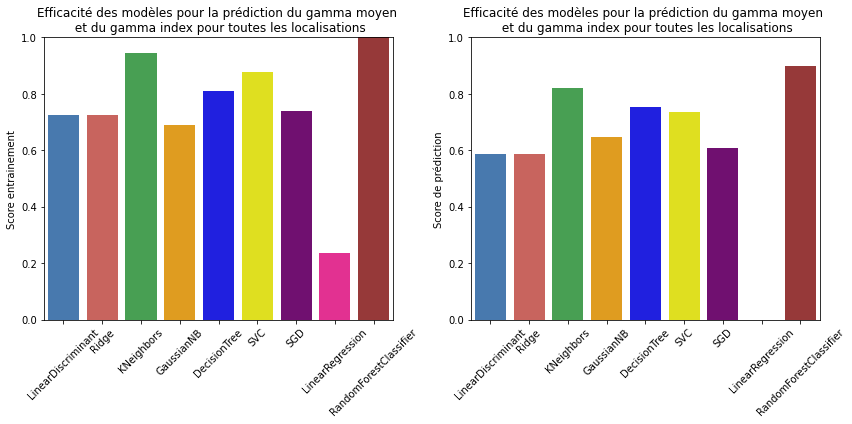

In [ ]:
List_of_models = [LinearDiscriminantAnalysis(solver = 'svd', store_covariance = True, tol = 0.0001),
                  RidgeClassifier(alpha = 1, copy_X = True, fit_intercept = True, solver = 'saga', tol = 0.0003),
                  KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', p = 2),
                  GaussianNB(var_smoothing = 0.1873817422860384),
                  DecisionTreeClassifier(criterion = 'gini', max_depth = 15, min_samples_leaf = 1, min_samples_split = 0.1, splitter = 'best'),
                  SVC(gamma = 1, kernel = 'rbf', probability = True),
                  SGDClassifier(alpha = 0.001, fit_intercept = True, l1_ratio = 0.3, loss = 'log', penalty = 'l1', tol = 0.0002),
                  LinearRegression(copy_X = True, fit_intercept = True, positive = False),
                  RandomForestClassifier(criterion = 'entropy', max_features = 'auto', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 30)]

List_of_models_for_graph = ["LinearDiscriminant", "Ridge", "KNeighbors", "GaussianNB", "DecisionTree", "SVC", "SGD", "LinearRegression", "RandomForestClassifier"]

df_results = pad.DataFrame(index = ["Score entrainement", "Score de prédiction", "MAE", "RMSE", "median absolute error"], columns = ["LinearDiscriminant"])

for i in range(len(List_of_models)):
  model_class = List_of_models[i] 
  model_class.fit(X_train_res, y_train_res)
  y_pred = model_class.predict(X_test)
  results_classification = np.array([model_class.score(X_train_res,y_train_res), model_class.score(X_test,y_test), mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred)), median_absolute_error(y_test,y_pred)])
  df_results[List_of_models_for_graph[i]] = results_classification

  df_graph = df_results.transpose()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1 = sns.barplot(x=df_graph.index, y=df_graph["Score entrainement"].values, data=df_graph, ax=axs[0], palette = custom_palette)
ax2 = sns.barplot(x=df_graph.index, y=df_graph["Score de prédiction"].values, data=df_graph, palette = custom_palette)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title('Efficacité des modèles pour la prédiction du gamma moyen \n et du gamma index pour toutes les localisations')
ax1.set_ylabel('Score entrainement')
ax1.set(ylim=(0, 1))
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title('Efficacité des modèles pour la prédiction du gamma moyen \n et du gamma index pour toutes les localisations')
ax2.set_ylabel('Score de prédiction')
ax2.set(ylim=(0, 1))

plt.tight_layout()
#fig.savefig("Performance modèles classification toutes localisations predictions gmgi", dpi = 400)

# Choix du meilleur modèle

Choix du meilleur modèle

In [ ]:
model_ =  
model_.fit(X_train_res, y_train_res)

joblib.dump(model_, 'model_gmgi.joblib')

['model_kn_gmgi.joblib']

In [ ]:
model_ = load('model_gmgi.joblib')

Courbe ROC et AUC :

Best Threshold=0.200000, G-Mean=0.908
AUC=0.938064


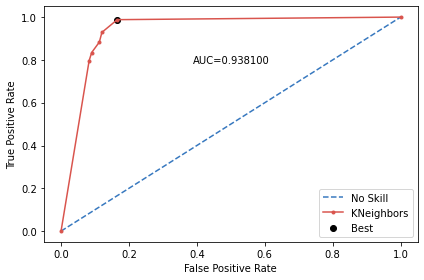

In [ ]:
from numpy import argmax
from numpy import sqrt
from google.colab import files

yhat = model_.predict_proba(X)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
auc = roc_auc_score(y, yhat)
print('AUC=%f' %auc)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='XXX')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.text(0.5,0.8,'AUC=%f' %round(auc,4) ,horizontalalignment='center',
     verticalalignment='center', fontsize=10, color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.tight_layout()

#plt.savefig("ROC kn gmgi toutes localisations", dpi=400)
plt.show()

In [ ]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

In [ ]:
from numpy import arange
yhat = model_.predict_proba(X)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y, to_labels(probs, t)) for t in thresholds]
# get best threshold
ax = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.005, F-Score=0.98668


Probabilité d'appartenance d'une classe : [Class 0 , Class 1]

In [ ]:
yhat

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. ,

In [ ]:
predictions = np.where(yhat[:,0]>0.50,0,1)

Matrice de confusion et recherche d'une valeur seuil :

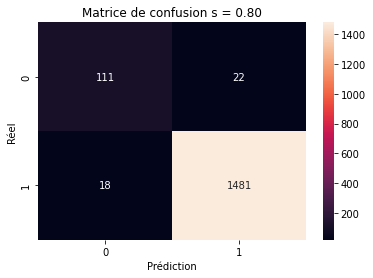

In [ ]:
conf_matrix_SGD_01 = tf.math.confusion_matrix(labels=y, predictions= np.where(yhat[:,0]>0.50,0,1))
 
ax_sgd_01 = sns.heatmap(conf_matrix_SGD_01, annot = True, fmt='d')
ax_sgd_01.set_title('Matrice de confusion s = 0.50')
ax_sgd_01.set_ylabel('Réel')
ax_sgd_01.set_xlabel('Prédiction')
#plt.savefig("Matrice de confusion kn gmgi toutes localisations", dpi=400)
plt.show()


Création d'un dataframe permettant d'obtenir les prédictions :

In [ ]:
df['ClassPredict_'] = predictions

In [ ]:
df['ClassPredict_'].to_csv('prediction_gmgi_.csv', index = False)